# INTRODUCTION
<br>
<p>Death penalty is a government-sanctioned practice whereby a person is killed by the state as a punishment for a crime. Capital punishment is a matter of active controversy in several countries and states, and positions can vary within a single political ideology or cultural region. The Council of Europe, which has 47 member states, has sought to abolish the use of the death penalty by its members absolutely, through Protocol 13 of the European Convention on Human Rights. However, this only affects those member states which have signed and ratified it, and they do not include Armenia, Russia, and Azerbaijan. Although most nations have abolished capital punishment, over 60% of the world's population live in countries where the death penalty is retained, such as China, India, the United States, Indonesia, Pakistan, Bangladesh, Nigeria, Egypt, Iran, among all mostly Islamic countries, as is maintained in Japan and Sri Lanka. <a href="https://en.wikipedia.org/wiki/Capital_punishment">Learn more</a></p>
<p>This dataset includes information on criminals executed by Texas Department of Criminal Justice from 1982 to November 8th, 2017
<br/><br/>The dataset consists of 545 observations with 21 variables. They are: <br/>
    - <b>Execution</b>: The order of execution, numeric. <br/>
    - <b>LastName</b>: Last name of the offender, character. <br/>
    - <b>FirstName</b>: First name of the offender, character. <br/>
    - <b>TDCJNumber</b>: TDCJ Number of the offender, numeric. <br/>
    - <b>Age</b>: Age of the offender, numeric. <br/>
    - <b>Race</b>: Race of the offender, categorical : Black, Hispanic, White, Other. <br/>
    - <b>CountyOfConviction</b>: County of conviction, character. <br/>
    - <b>AgeWhenReceived</b>: Age of offender when received, numeric. <br/>
    - <b>EducationLevel</b>: Education level of offender, numeric. <br/>
    - <b>Native County</b>: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas. <br/>
    - <b>PreviousCrime</b> : Whether the offender committed any crime before, categorical: 0= No, 1= Yes. <br/>
    - <b>Codefendants</b>: Number of co-defendants, numeric. <br/>
    - <b>NumberVictim</b>: Number of victims, numeric. <br/>
    - <b>WhiteVictim, HispanicVictim, BlackVictim, VictimOtherRace. FemaleVictim, MaleVictim</b>: Number of victims with specified demographic features, numeric. <br/>
    - <b>LastStatement</b>: Last statement of offender, character.</p>
    

<br><br>
<img src="https://fee.org/media/29658/deathpenaltyelectricchair.jpg?center=0.42737430167597767,0.48&mode=crop&width=1920&rnd=131783744600000000" width="700px" />


<br>
<br>
<br>

**We will try to predict if an offender is male or female by using his/her last statement and age.**

## <font color = "blue">**Reading and Cleaning Data**</font>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Texas Last Statement - Excel.xlsx', 'Texas Last Statement - CSV.csv']


In [4]:
df = pd.read_csv("../input/Texas Last Statement - CSV.csv", encoding="latin1")

In [5]:
df.head()

,Execution,LastName,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther Races,FemaleVictim,MaleVictim,LastStatement
0,545,Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28.0,11.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"This is my statement: My final words. First, I..."
1,544,Pruett,Robert,999411,38,White,Bee,22.0,8.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,I just want to let everyone in here to know I ...
2,543,Preyor,Taichin,999494,46,Black,Bexar,34.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"First and foremost I'd like to say, ""Justice h..."
3,542,Bigby,James,997,61,White,Tarrant,36.0,9.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,"Yes, I do, Grace Kehler is that you? I have gi..."
4,541,Ruiz,Rolando,999145,44,Hispanic,Bexar,22.0,10.0,0.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,"Yes sir, I would first like to say to the Sanc..."


In [6]:
df["Gender"] = 0
genderList = [1 if i == 1.0 else 0 for i in df.MaleVictim]
df.Gender = genderList

In [7]:
df.drop(["Execution","TDCJNumber","PreviousCrime","Codefendants","NumberVictim","WhiteVictim","HispanicVictim","BlackVictim","VictimOther Races",],axis=1, inplace=True)

In [8]:
df.drop(["FemaleVictim","MaleVictim"],axis=1,inplace=True)

df.head()

,LastName,FirstName,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,LastStatement,Gender
0,Cardenas,Ruben,47,Hispanic,Hidalgo,28.0,11.0,1.0,"This is my statement: My final words. First, I...",0
1,Pruett,Robert,38,White,Bee,22.0,8.0,0.0,I just want to let everyone in here to know I ...,1
2,Preyor,Taichin,46,Black,Bexar,34.0,10.0,0.0,"First and foremost I'd like to say, ""Justice h...",1
3,Bigby,James,61,White,Tarrant,36.0,9.0,0.0,"Yes, I do, Grace Kehler is that you? I have gi...",1
4,Ruiz,Rolando,44,Hispanic,Bexar,22.0,10.0,0.0,"Yes sir, I would first like to say to the Sanc...",0


In [9]:
df.dropna(inplace=True)


In [10]:
df.AgeWhenReceived = df.AgeWhenReceived.astype(int)
df.EducationLevel = df.EducationLevel.astype(int)
df.head()

,LastName,FirstName,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,LastStatement,Gender
0,Cardenas,Ruben,47,Hispanic,Hidalgo,28,11,1.0,"This is my statement: My final words. First, I...",0
1,Pruett,Robert,38,White,Bee,22,8,0.0,I just want to let everyone in here to know I ...,1
2,Preyor,Taichin,46,Black,Bexar,34,10,0.0,"First and foremost I'd like to say, ""Justice h...",1
3,Bigby,James,61,White,Tarrant,36,9,0.0,"Yes, I do, Grace Kehler is that you? I have gi...",1
4,Ruiz,Rolando,44,Hispanic,Bexar,22,10,0.0,"Yes sir, I would first like to say to the Sanc...",0


## <font color = "blue">**Explore Data**</font>

### Ages

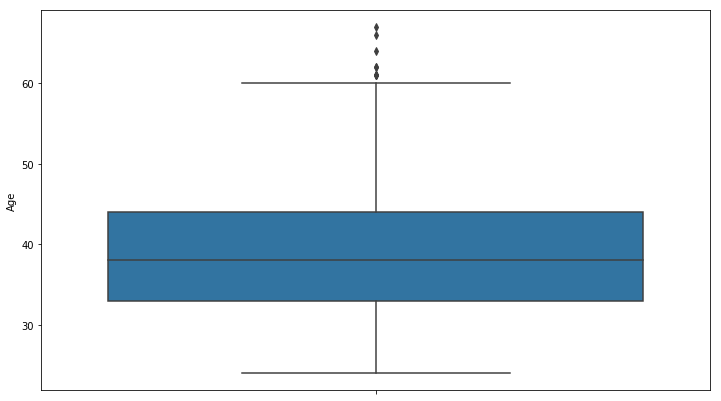

Minimum Age is 24
Maximum Age is 67
Average Age is 39.5


In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(y=df.Age)
plt.show()

print("Minimum Age is {}".format(df.Age.min()))
print("Maximum Age is {}".format(df.Age.max()))
print("Average Age is {:.1f}".format(df.Age.mean()))

In [12]:
df.corr()

,Age,AgeWhenReceived,EducationLevel,NativeCounty,Gender
Age,1.000000,0.841613,0.075638,0.005518,-0.079825
AgeWhenReceived,0.841613,1.000000,0.090370,-0.012444,-0.076367
EducationLevel,0.075638,0.090370,1.000000,0.104407,-0.062285
NativeCounty,0.005518,-0.012444,0.104407,1.000000,-0.068271
Gender,-0.079825,-0.076367,-0.062285,-0.068271,1.000000


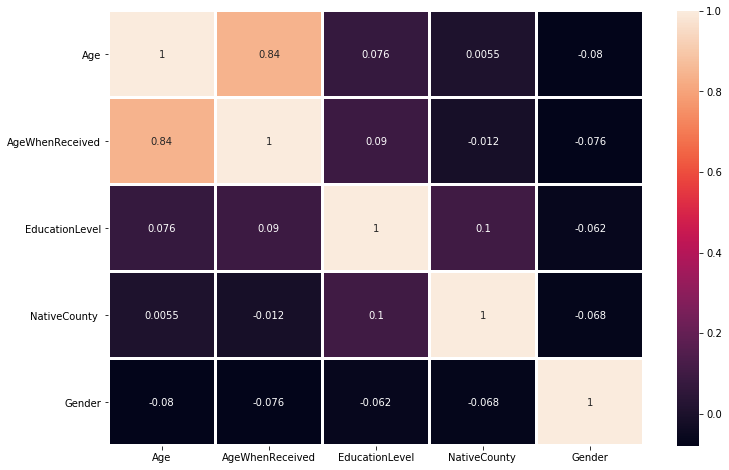

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), linewidths=2, annot=True)
plt.show()

Not suprisingly Age and AgeWhenReceived correlated with each other. But other features not saying much. Let's continue.

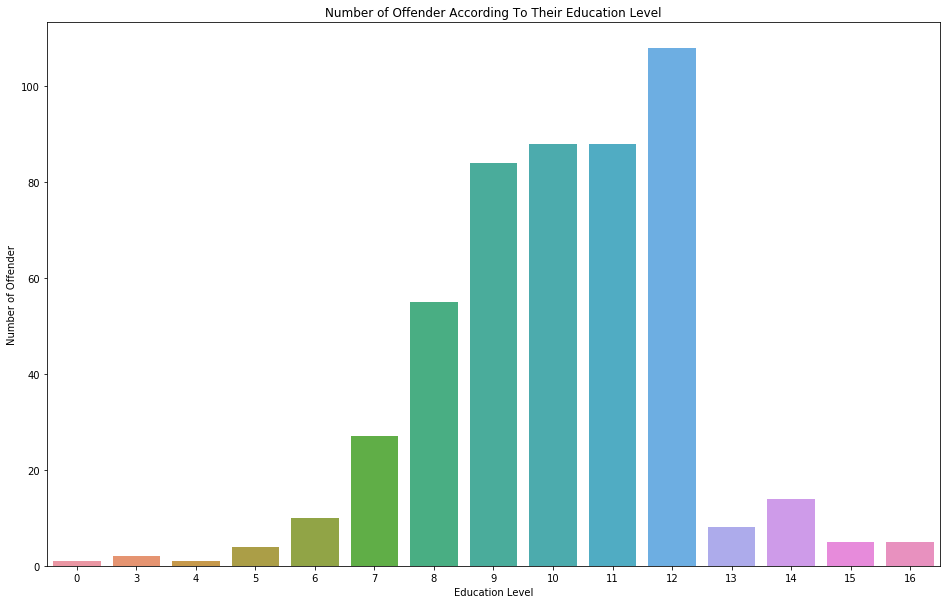

In [15]:
educationList= sorted(list(zip(df.EducationLevel.value_counts().index, df.EducationLevel.value_counts().values)))
eduYear, eduCount = zip(*educationList)
eduYear, eduCount = list(eduYear), list(eduCount)

plt.figure(figsize=(16,10))
plt.xlabel("Education Level")
plt.ylabel("Number of Offender")
plt.title("Number of Offender According To Their Education Level")
sns.barplot(x=eduYear,y=eduCount)
plt.show()

We can see that most of the offenders were graduated from high school or they were high school drop out.

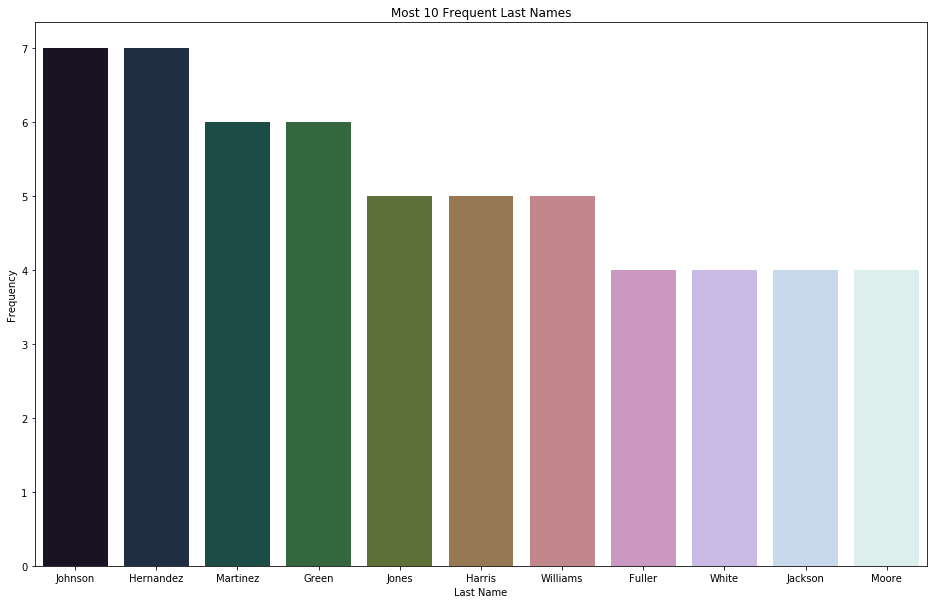

In [17]:
plt.figure(figsize=(16,10))
plt.xlabel("Last Name")
plt.ylabel("Frequency")
plt.title("Most 10 Frequent Last Names")
sns.barplot(x=df.LastName.value_counts()[:11].index,y=df.LastName.value_counts()[:11].values, palette="cubehelix")
plt.show()

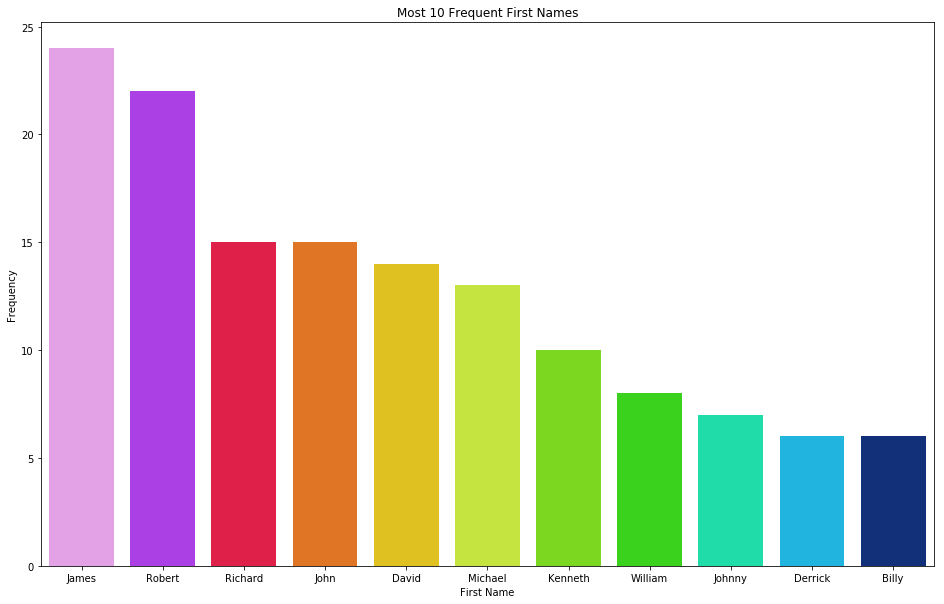

In [18]:
plt.figure(figsize=(16,10))
plt.xlabel("First Name")
plt.ylabel("Frequency")
plt.title("Most 10 Frequent First Names")
sns.barplot(x=df.FirstName.value_counts()[:11].index,y=df.FirstName.value_counts()[:11].values, palette="gist_ncar_r")
plt.show()

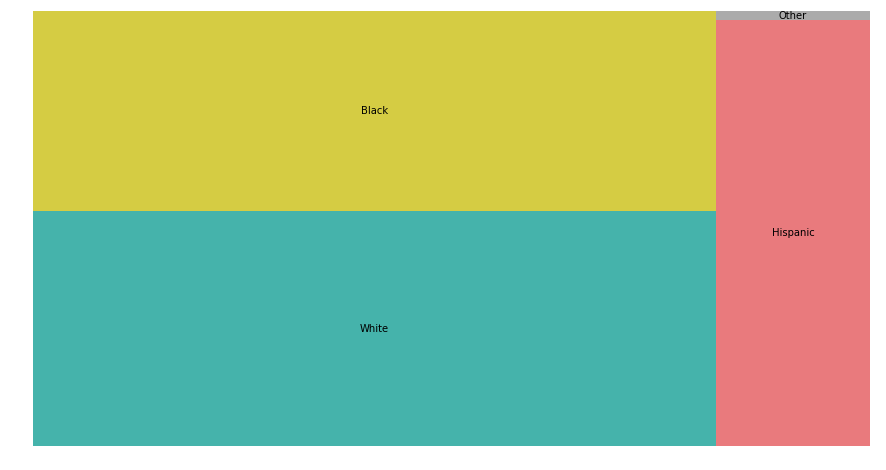

In [19]:
import squarify

plt.figure(figsize=(15,8))
squarify.plot(sizes=df.Race.value_counts().values, label=df.Race.value_counts().index, color=["#17A096","#CBC015","#E4595D", "#979797"], alpha=.8 )
plt.axis('off')
plt.show()

In [20]:
print(df.Race.value_counts())

White       220
Black       188
Hispanic     90
Other         2
Name: Race, dtype: int64


Majority of offenders were White with 220 persons. 188 of offenders were Black and 90 of them were Hispanic.

## <font color="blue">**Natural Language Process**</font>

Now we have to do some operations to prepare data but before applying that operations whole statements I will show you what actually we will do with one example step by step.

In [27]:
# We use regular expression to delete non-alphabetic characters on data.
import re

first_lastStatement = df.LastStatement[0]
lastStatement = re.sub("[^a-zA-Z]"," ",first_lastStatement)

In [28]:
print(lastStatement)

This is my statement  My final words  First  I want to thank my family for believing in me and being there with me till the end  I love you all very much  And I know that you love me too  Life does go on  Next  I would like to also thank my attorney s Maurie Levin  Alicia Amezcua Rodriguez and Sandra Babcock for all their hard work they have done to help me out  I am so thankful   I would also like to thank the Mexican Consul for all their help too  and every government official that was trying to help me out too  Thank you Maricela Luna and Julia Thimm for being such good friends   Now   I will not and cannot apologize for someone else s crime  but  I will be back for justice   You can count on that  Thank you 


In [29]:
# Since upper and lower characters are (e.g a - A) evaluated like they are different each other by computer we make turn whole characters into lowercase.

lastStatement = lastStatement.lower()
print(lastStatement)

this is my statement  my final words  first  i want to thank my family for believing in me and being there with me till the end  i love you all very much  and i know that you love me too  life does go on  next  i would like to also thank my attorney s maurie levin  alicia amezcua rodriguez and sandra babcock for all their hard work they have done to help me out  i am so thankful   i would also like to thank the mexican consul for all their help too  and every government official that was trying to help me out too  thank you maricela luna and julia thimm for being such good friends   now   i will not and cannot apologize for someone else s crime  but  i will be back for justice   you can count on that  thank you 


In [30]:
import nltk  # Natural Language Tool Kit

nltk.download("stopwords")  # If you dont't have that module this line will download it.
nltk.download('punkt') # It's necessary to import the module

from nltk.corpus import stopwords # We are importing 'stopwords'

lastStatement = nltk.word_tokenize(lastStatement) # We tokenized the statement

print(lastStatement)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
['this', 'is', 'my', 'statement', 'my', 'final', 'words', 'first', 'i', 'want', 'to', 'thank', 'my', 'family', 'for', 'believing', 'in', 'me', 'and', 'being', 'there', 'with', 'me', 'till', 'the', 'end', 'i', 'love', 'you', 'all', 'very', 'much', 'and', 'i', 'know', 'that', 'you', 'love', 'me', 'too', 'life', 'does', 'go', 'on', 'next', 'i', 'would', 'like', 'to', 'also', 'thank', 'my', 'attorney', 's', 'maurie', 'levin', 'alicia', 'amezcua', 'rodriguez', 'and', 'sandra', 'babcock', 'for', 'all', 'their', 'hard', 'work', 'they', 'have', 'done', 'to', 'help', 'me', 'out', 'i', 'am', 'so', 'thankful', 'i', 'would', 'also', 'like', 'to', 'thank', 'the', 'mexican', 'consul', 'for', 'all', 'their', 'help', 'too', 'and', 'every', 'government', 'official', 'that', 'w

In [31]:
# We will remove words like 'the', 'or', 'and', 'is' etc.

lastStatement = [i for i in lastStatement if not i in set(stopwords.words("english"))]
print(lastStatement)

['statement', 'final', 'words', 'first', 'want', 'thank', 'family', 'believing', 'till', 'end', 'love', 'much', 'know', 'love', 'life', 'go', 'next', 'would', 'like', 'also', 'thank', 'attorney', 'maurie', 'levin', 'alicia', 'amezcua', 'rodriguez', 'sandra', 'babcock', 'hard', 'work', 'done', 'help', 'thankful', 'would', 'also', 'like', 'thank', 'mexican', 'consul', 'help', 'every', 'government', 'official', 'trying', 'help', 'thank', 'maricela', 'luna', 'julia', 'thimm', 'good', 'friends', 'apologize', 'someone', 'else', 'crime', 'back', 'justice', 'count', 'thank']


#### Lematization

In [32]:
# e.g: loved => love

nltk.download('wordnet') # It can be necessary
import nltk as nlp

lemmatization = nlp.WordNetLemmatizer()
lastStatement = [lemmatization.lemmatize(i) for i in lastStatement]

print(lastStatement)

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
['statement', 'final', 'word', 'first', 'want', 'thank', 'family', 'believing', 'till', 'end', 'love', 'much', 'know', 'love', 'life', 'go', 'next', 'would', 'like', 'also', 'thank', 'attorney', 'maurie', 'levin', 'alicia', 'amezcua', 'rodriguez', 'sandra', 'babcock', 'hard', 'work', 'done', 'help', 'thankful', 'would', 'also', 'like', 'thank', 'mexican', 'consul', 'help', 'every', 'government', 'official', 'trying', 'help', 'thank', 'maricela', 'luna', 'julia', 'thimm', 'good', 'friend', 'apologize', 'someone', 'else', 'crime', 'back', 'justice', 'count', 'thank']


In [33]:
# Now we turn our lastStatement list into sentence again

lastStatement = " ".join(lastStatement)

print(lastStatement)

statement final word first want thank family believing till end love much know love life go next would like also thank attorney maurie levin alicia amezcua rodriguez sandra babcock hard work done help thankful would also like thank mexican consul help every government official trying help thank maricela luna julia thimm good friend apologize someone else crime back justice count thank


## Preparing Entire Data

In [34]:
statementList = list()

for statement in df.LastStatement:
    statement = re.sub("[^a-zA-Z]"," ",statement)
    statement = statement.lower()
    statement = nltk.word_tokenize(statement)
    statement = [i for i in statement if not i in set(stopwords.words("english"))]
    statement = [lemmatization.lemmatize(i)for i in statement]
    statement = " ".join(statement)
    statementList.append(statement)

In [35]:
statementList

['statement final word first want thank family believing till end love much know love life go next would like also thank attorney maurie levin alicia amezcua rodriguez sandra babcock hard work done help thankful would also like thank mexican consul help every government official trying help thank maricela luna julia thimm good friend apologize someone else crime back justice count thank',
 'want let everyone know love much hurt lot people lot people hurt love much life end go forever learn lesson life hard way one day need hurt people love much ready go back nighty night everybody nighty night everybody done warden',
 'first foremost like say justice never advanced taking life coretta scott king lastly wife kid love forever always',
 'yes grace kehler given warden jones written statement explain lot hope bring closure answer question hope bring peace sorry pain suffering sorry went terribly long time sorry especially grace kehler kehler johnson crain family pray hate jesus letter expla

### Bag of Words

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 600
count_vectorizer = CountVectorizer(max_features=max_features) 
sparce_matrix = count_vectorizer.fit_transform(statementList)
sparce_matrix = sparce_matrix.toarray()

print("Most Frequent {} Words: {}".format(max_features, count_vectorizer.get_feature_names()))

Most Frequent 600 Words: ['able', 'accept', 'act', 'action', 'adam', 'address', 'ago', 'ah', 'ahead', 'alive', 'allah', 'allow', 'allowed', 'almighty', 'already', 'alright', 'also', 'always', 'amen', 'america', 'american', 'angel', 'anger', 'angry', 'another', 'answer', 'anybody', 'anyone', 'anything', 'apologize', 'apology', 'appeal', 'appreciate', 'arm', 'around', 'art', 'ask', 'asked', 'asking', 'attorney', 'aunt', 'away', 'baby', 'back', 'bad', 'bear', 'beautiful', 'began', 'behind', 'believe', 'beside', 'best', 'better', 'big', 'black', 'blame', 'bless', 'blessed', 'blessing', 'blood', 'bobby', 'body', 'boswell', 'boy', 'bread', 'bring', 'brings', 'brother', 'brought', 'bury', 'bye', 'call', 'called', 'came', 'care', 'carry', 'case', 'cause', 'caused', 'chance', 'change', 'changed', 'chaplain', 'child', 'chris', 'christ', 'church', 'closure', 'come', 'comfort', 'coming', 'commit', 'committed', 'community', 'confess', 'continue', 'convicted', 'could', 'country', 'court', 'crime', '

In [37]:
y = df.iloc[:,9].values # gender column
x = sparce_matrix

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 42)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

# Prediction
y_pred = nb.predict(x_test)

In [39]:
print("Accuracy: {:.2f}%".format(nb.score(y_pred.reshape(-1,1), y_test)*100))

Accuracy: 60.00%


Let's try this algorithm by adding age feature beside last statement.

In [40]:
df2 = pd.DataFrame(sparce_matrix)
df2["Age"] = df.Age
df2["Age"].fillna((df2["Age"].mean()),inplace=True)

# Normalization
x2 = (df2 - np.min(df2)) / (np.max(df2) - np.min(df2)).values

In [41]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size = 0.05, random_state = 42)

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train2, y_train2)

# Prediction
y_pred2= nb.predict(x_test2)

In [42]:
print("Accuracy: {:.2f}%".format(nb.score(y_pred2.reshape(-1,1), y_test2)*100))

Accuracy: 64.00%


## Our model works with <font color="red">**64% accuracy**</font> which is okay.

**Thank you! Please upvote and make me comment your feedback to help me improve myself**